<b>EDA - Exploratory Data Analysis</b>

This notebook performs exploratory data analysis on the brain MRI segmentation dataset.
You will see:

- Dataset sizes (train/test)

- Number of slices per volume

- Voxel spacing (if available)

- Intensity distributions

- Class mask counts & tumor‐pixel ratios

- Example slice visualizations

In [ ]:
### IMPORTS ###
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Project utilities
sys.path.append(os.path.abspath("src"))
from src.dataloader import get_mri_dataloader
from utils_visualization import (
    plot_intensity_histogram,
    show_multiple_slices
)
from src.utils_eda import compute_dataset_stats, compute_tumor_ratio


In [11]:
### SETUP ###
DATA_DIR       = "/datasets/tdt4265/mic/open/HNTS-MRG"

# Load DataLoader for training set
train_loader, _ = get_mri_dataloader(
    data_dir=DATA_DIR,
    subset="train",
    batch_size=1,
    validation_fraction=0.1
)

# Underlying dataset for indexing and stats
dataset = train_loader.dataset

print(f"Number of volumes (dataset): {len(dataset)}")
print(f"Number of batches (loader): {len(train_loader)}")

Loading dataset:   0%|          | 0/130 [00:00<?, ?it/s]

Loading dataset: 100%|██████████| 130/130 [02:01<00:00,  1.07it/s]

Number of volumes (dataset): 130
Number of batches (loader): 117


,num_slices
count,117.0
mean,48.0
std,0.0
min,48.0
25%,48.0
50%,48.0
75%,48.0
max,48.0


Mask voxel counts: {0: 1231065300, 1: 4615311, 2: 5718639}
Tumor-pixel ratio: 0.0083


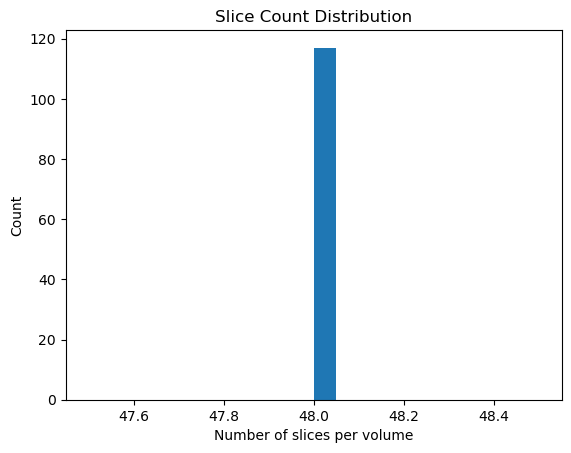

In [13]:
### DATASET STATISTICS ###
# Compute stats using our EDA utilities
tats = compute_dataset_stats(train_loader)
# Build DataFrame of slice counts for summary
df_slices = pd.DataFrame({ 'num_slices': tats['slice_counts'] })

# Summary stats
display(df_slices.describe())
print("Mask voxel counts:", tats['mask_counts'])
print(f"Tumor-pixel ratio: {compute_tumor_ratio(tats['mask_counts']):.4f}")

# Plot distribution of slice counts
plt.figure()
plt.hist(df_slices['num_slices'], bins=20)
plt.xlabel('Number of slices per volume')
plt.ylabel('Count')
plt.title('Slice Count Distribution')
plt.show()

In [15]:
# Replace with actual path to a .nii.gz file 
sample_path = os.path.join(
    DATA_DIR, 'train', '75', 'preRT', '75_preRT_T2.nii.gz'
)
header_info = get_header_info(sample_path)
print(header_info)

{'shape': (512, 512, 70), 'voxel_sizes': (0.5, 0.5, 2.0)}


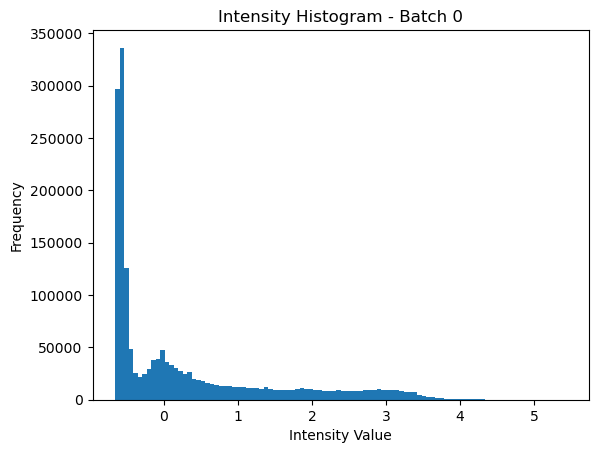

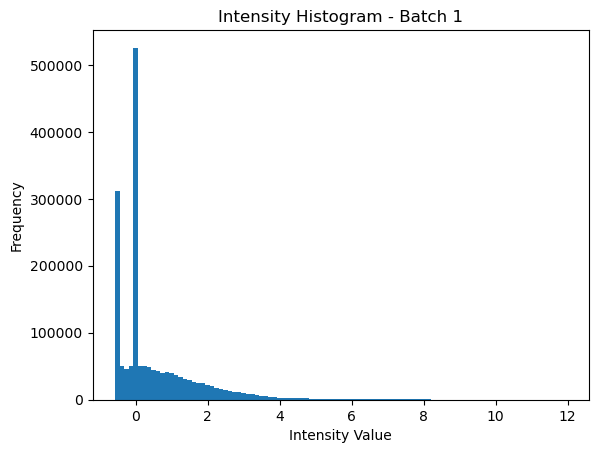

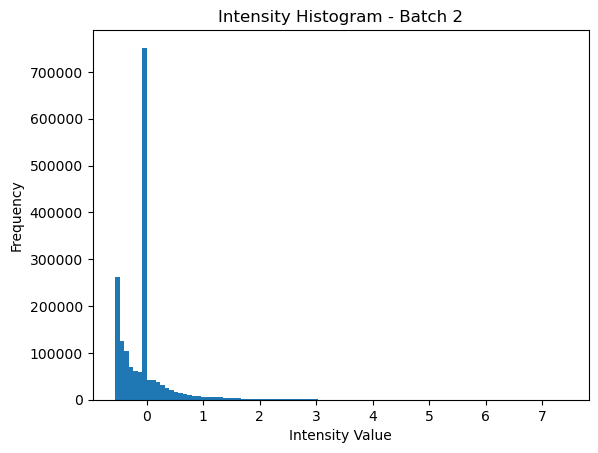

In [21]:
# Plot histograms for first few batches
for i, batch in enumerate(train_loader):
    img_tensor = batch['image'][0]  # Tensor shape [1, H, W, D]
    img = img_tensor.detach().cpu().numpy().squeeze()  # NumPy array shape [H, W, D]
    plot_intensity_histogram(
        img,
        bins=100,
        title=f"Intensity Histogram - Batch {i}"
    )
    if i == 2:
        break

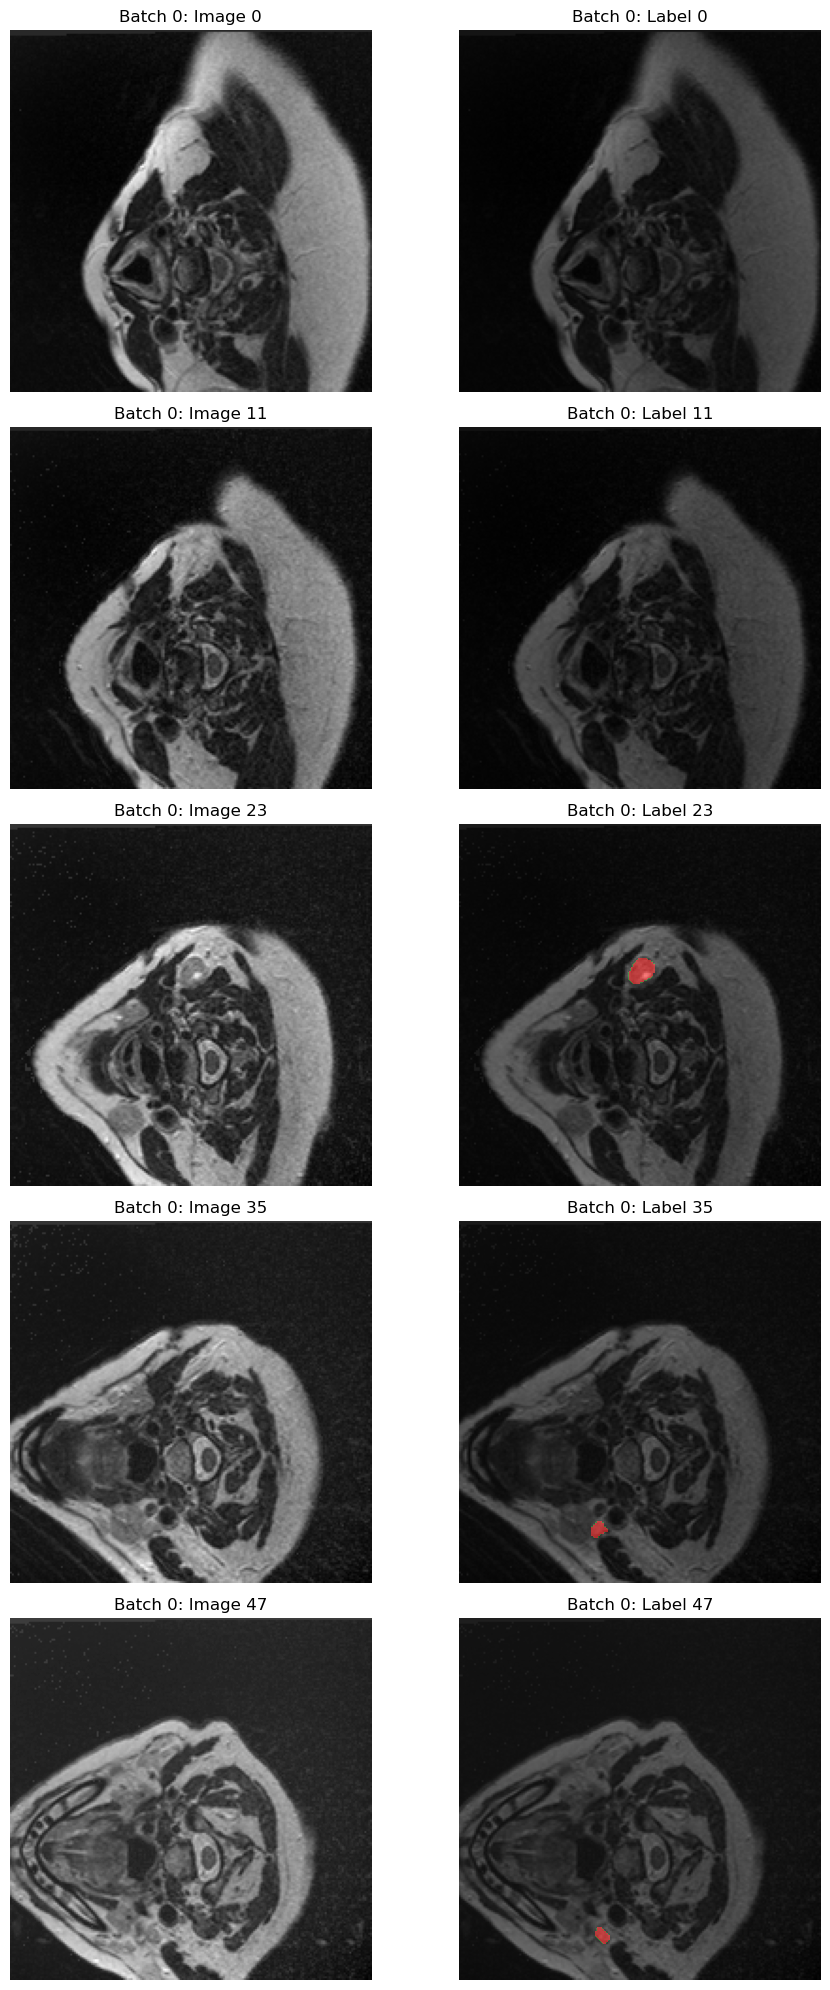

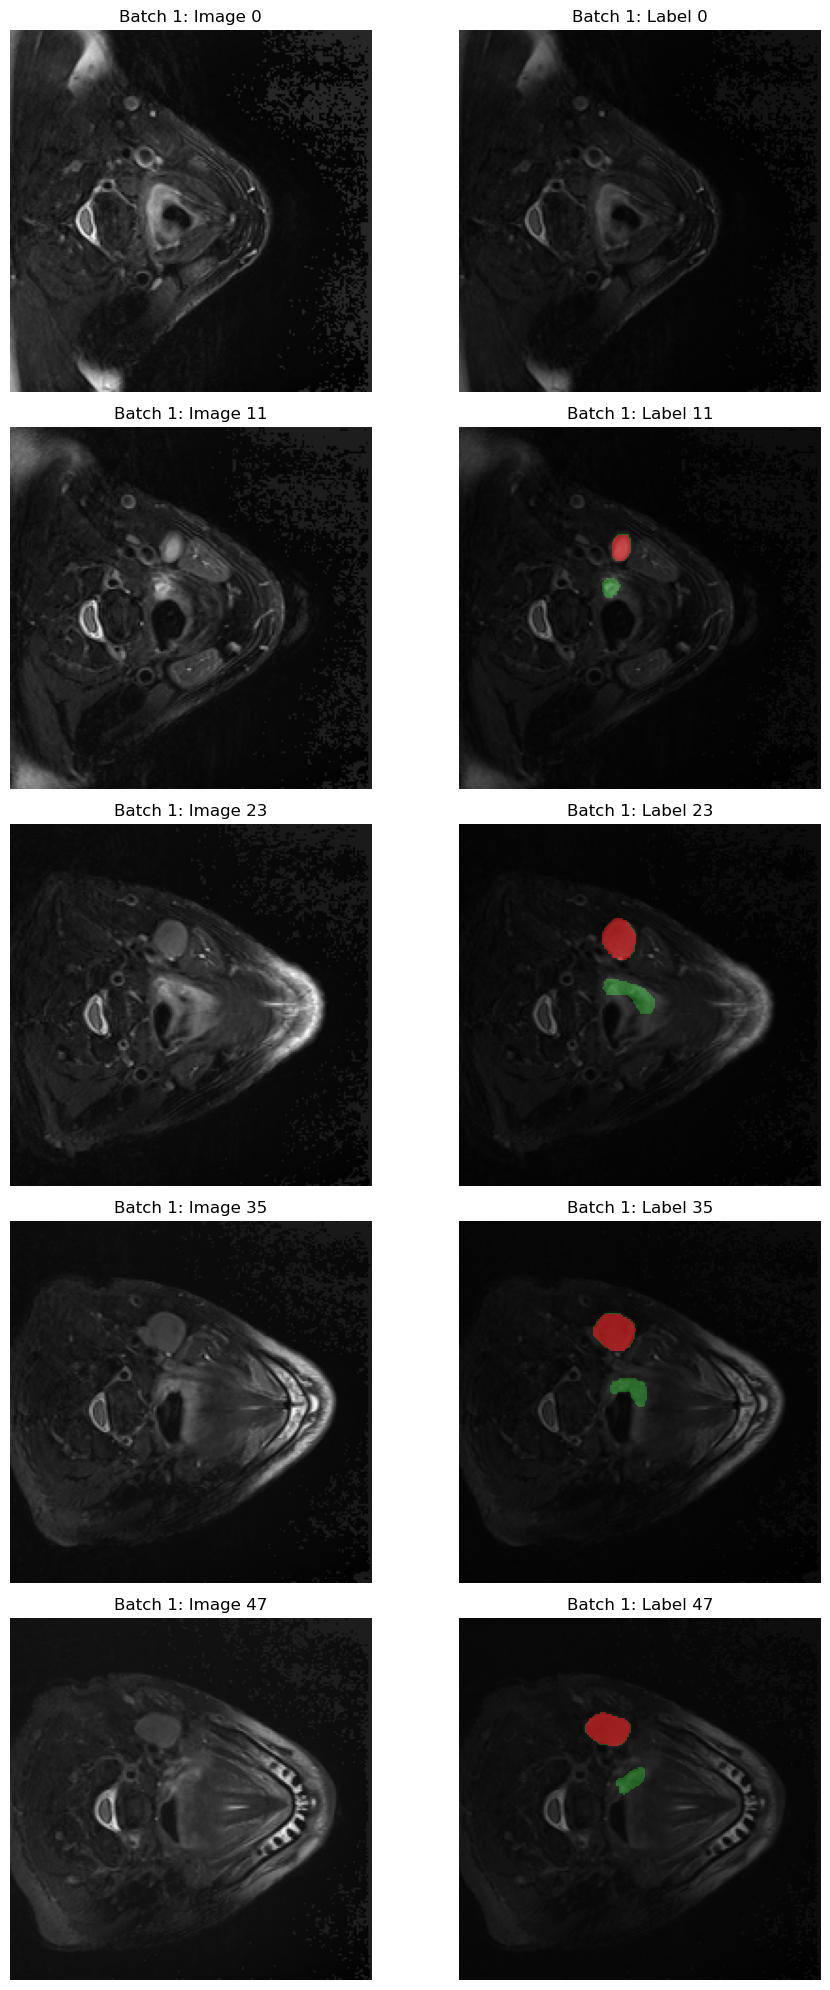

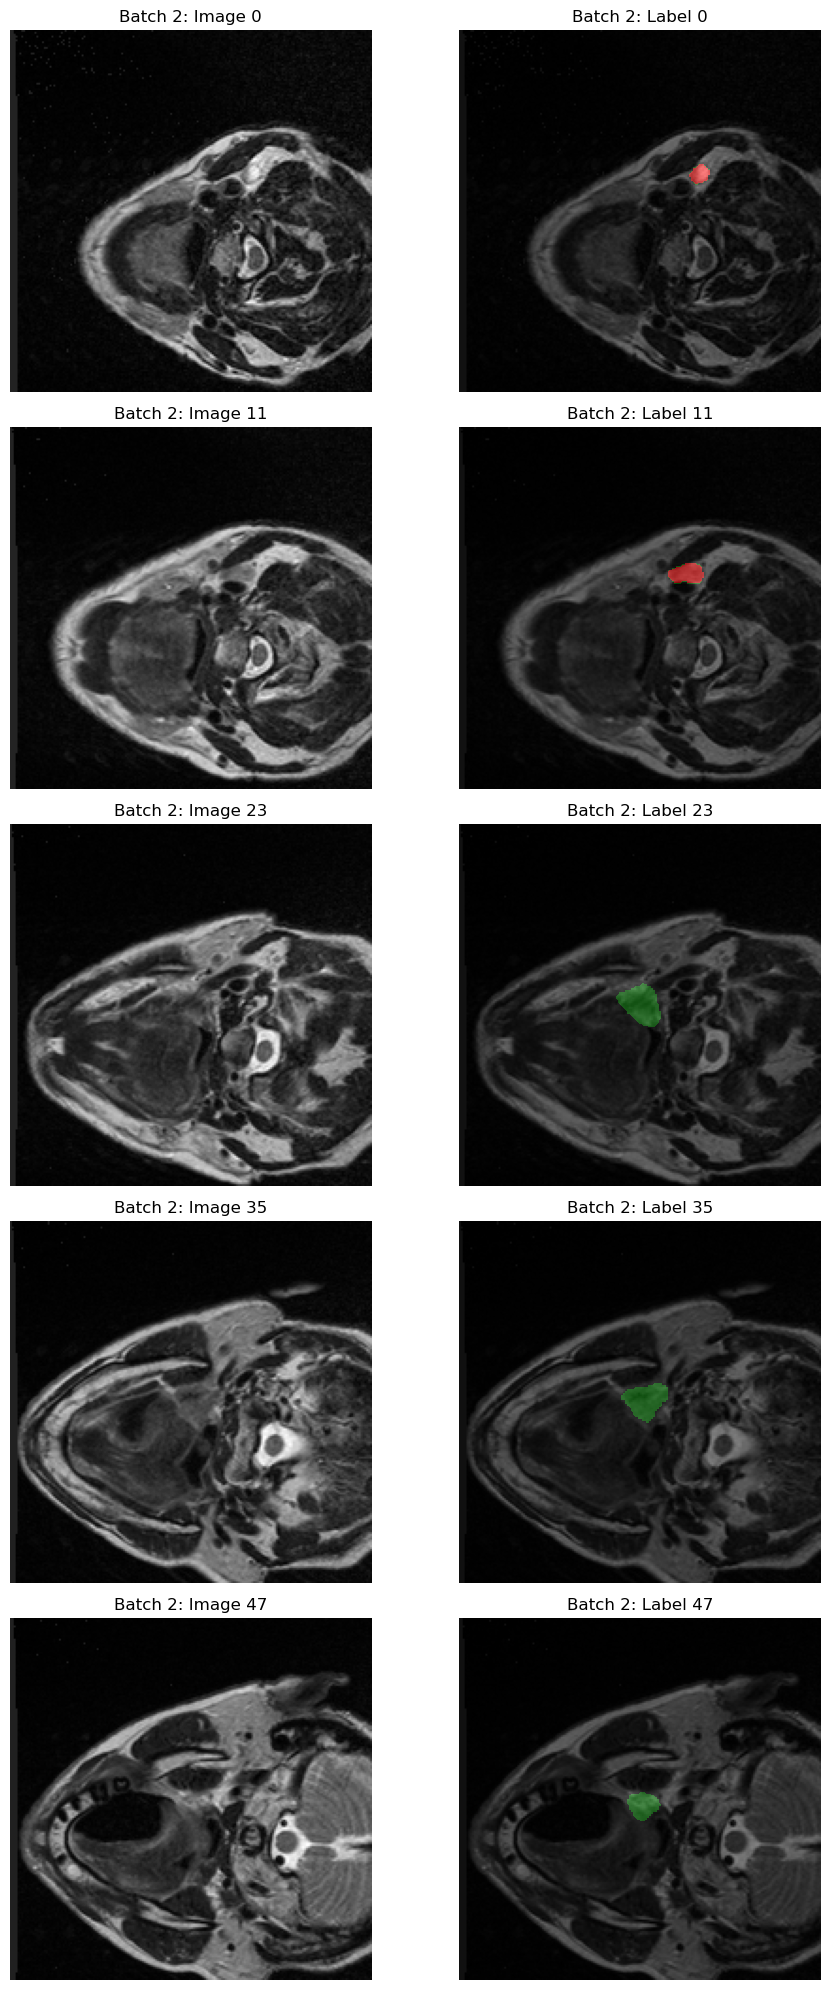

In [22]:
for i, batch in enumerate(train_loader):
    img = batch['image'][0].detach().cpu().numpy().squeeze()
    msk = batch['label'][0].detach().cpu().numpy().squeeze()
    show_multiple_slices(
        img,
        msk,
        slice_indices=None,
        title_prefix=f"Batch {i}: "
    )
    if i == 2:
        break